<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_Multilayer_perceptron_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

# import dataset


In [248]:
cred_data1=pd.read_csv("/content/drive/MyDrive/credit_card_fraud.csv")
cred_data1

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,Transaction Notes
0,24-09-2022 13:54,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,Apr-29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,Consequatur corporis minima ad vero deserunt n...
1,24-07-2020 11:20,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,Mar-26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,Dolore repellendus odio deleniti. Eaque quibus...
2,18-03-2023 01:05,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,Nov-29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,Unde beatae perspiciatis sapiente. Voluptates ...
3,07-01-2021 21:53,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,Sep-25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,Cupiditate repellendus necessitatibus quo occa...
4,16-12-2021 06:22,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,Mar-31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,Molestias assumenda consectetur itaque veritat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,17-12-2020 20:36,2214.15,Lakshay Khatri,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,Manda Ltd,1236,Anantapuram,EUR,Visa,Apr-26,d4b9aead1dd10a596542d1d8211a5021b9c3e894751d01...,5,0d219c55-87cf-43af-a1bb-cda408710de1,0,1,Online,214.34.176.247,Mobile,Et maiores quaerat fugiat voluptatibus reprehe...
7996,04-07-2022 05:19,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,Visa,Nov-25,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,In-Person,34.237.199.33,Tablet,Assumenda maxime provident rem quis consequunt...
7997,14-08-2022 19:14,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,May-24,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,In-Person,220.203.140.160,Tablet,Voluptatibus odit praesentium iste libero ipsa...
7998,16-05-2021 18:21,3035.31,Chirag Rege,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,Sep-24,e7866fdc6672f827c76f6124ca3eeaff44aff8b7caf4ee...,0,2424f724-8bd2-4dd0-8b39-e824999a9764,1,1,In-Person,216.56.133.227,Tablet,Animi excepturi nam distinctio fuga. Vel eius ...


In [249]:
cred_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Card Number (Hashed or Encrypted)        8000 non-null   object 
 4   Merchant Name                            8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           8000 no

In [250]:
cred_data1.isnull().sum()

Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Card Number (Hashed or Encrypted)          0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
CVV Code (Hashed or Encrypted)             0
Transaction Response Code                  0
Transaction ID                             0
Fraud Flag or Label                        0
Previous Transactions                      0
Transaction Source                         0
IP Address                                 0
Device Information                         0
Transaction Notes                          0
dtype: int64

In [251]:
cred_data1.shape

(8000, 19)

In [252]:
df=cred_data1.sample(frac=0.25)
df

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,Transaction Notes
4654,25-11-2021 18:08,3025.08,Nayantara Raja,898d74b2ee2f0725e9d5ccd8f6566a0f8dca26791b31bd...,Chander-Ramachandran,6815,Etawah,USD,MasterCard,Jun-33,01d54579da446ae1e75cda808cd188438834fa6249b151...,0,eb0d0d2a-189e-4cad-9eb0-4cfb17f244d6,0,2,In-Person,101.30.102.141,Desktop,Est possimus molestias architecto quis unde. N...
3834,06-06-2020 10:39,3391.51,Aaina Dar,a66fcaf333cab9bfc34fd0e4d5c475044953b7f6ba427e...,Chaudhari-Grewal,8557,Kishanganj,EUR,Visa,Jan-29,b543b2a3edcc48cc0f9d7159522673384b34fbce51920d...,12,bb48d9dd-658c-4783-9fa3-0d468d5e73ae,0,None,Online,172.233.159.248,Mobile,Quo quaerat sunt placeat architecto officia so...
7987,12-01-2022 09:00,890.56,Kimaya Korpal,0f5be61593b47721aec4709d0d952db8dec59cdb678d47...,Ganguly-Rajagopal,4020,Bhimavaram,USD,Visa,Sep-30,050a010ce24d0896056e9a36a1940738d38f469d644b36...,0,658a3901-477a-46dd-bff7-6ddfdb9cb730,1,2,Online,148.188.225.219,Desktop,Nobis distinctio esse amet. Natus illum odit u...
3817,05-04-2022 09:02,1530.82,Yakshit Mangat,7a8118c3b7f595f763dab9c323f9921293d27731a71af5...,Kaul-Dara,5640,Ludhiana,EUR,American Express,Jul-28,172e1676eda470ede17e9d491554bcbe97ba4691f92880...,5,72dbfff8-9e6d-4b72-b1cb-5fa5f3e3a2c2,0,1,Online,221.192.114.97,Tablet,Consequuntur itaque laborum modi quaerat hic c...
2531,21-09-2020 16:26,2588.62,Mahika Hans,90aab8bc315e9762878ee7800523384cc7a72e713debfd...,"Kapoor, Dara and Dugal",3485,Parbhani,INR,American Express,May-29,5b60f221d4a1852afd0194ad0857fae9c558608e35621d...,12,bafa7893-0868-4862-ba44-889ce95c1b04,0,3 or more,Online,171.189.145.159,Desktop,Qui aliquam voluptate provident accusamus exer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7892,13-02-2022 14:14,3501.56,Vaibhav Jain,1588b3a036e7c5d78406fd2f46079d7122a239e02f4e47...,"Amble, Sathe and Wadhwa",5600,Imphal,EUR,MasterCard,Apr-28,f626051bc94422f26f4b774a2bca105e122df36a2f32f5...,12,e05a5479-7141-431b-a352-2c62c3abc3e8,0,3 or more,Online,197.196.80.45,Mobile,Quis laborum vel sunt sunt. Accusamus providen...
6962,16-04-2021 07:29,671.05,Darshit Rout,9bd2a3b00b6c17622c93e7379a4277668a8e114ac84544...,Doshi-Virk,3083,Bhiwandi,USD,American Express,Dec-30,6c0f3412848008d49d186d5fad7fd1482656cfb62ad3c0...,12,09fd6b31-b275-411a-8f9c-998da8686bb8,1,1,Online,144.189.40.132,Tablet,Exercitationem veniam iure optio quisquam. Con...
6512,29-09-2022 21:24,3747.76,Sahil Yohannan,ea98a4069acb8cbc6436fe599a38834b59e312a3cb9f97...,Loyal LLC,7106,Katni,INR,MasterCard,Feb-25,2abaca4911e68fa9bfbf3482ee797fd5b9045b841fdff7...,12,95209997-c9e3-4566-8e7d-5f1b94defb6e,0,3 or more,In-Person,131.232.116.88,Tablet,Debitis ipsa neque tempora. Aut quod pariatur ...
1830,14-08-2023 05:16,2810.37,Aniruddh Jayaraman,0110f95b74a4989ce8d43abfc7aa8b72bfd6f91604bf6d...,"Subramanian, Edwin and Walla",7458,Bhind,USD,American Express,Jun-29,81f27f8a7d8766c72c0307a31327c1fad9007c6c3d3372...,12,e2e1592c-5190-4367-ad62-3995e383c199,0,1,Online,204.61.142.240,Tablet,Atque aspernatur explicabo voluptatibus quas.\...


In [253]:
#shape of the dataset
df.shape

(2000, 19)

In [254]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 4654 to 5064
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                2000 non-null   object 
 1   Transaction Amount                       2000 non-null   float64
 2   Cardholder Name                          2000 non-null   object 
 3   Card Number (Hashed or Encrypted)        2000 non-null   object 
 4   Merchant Name                            2000 non-null   object 
 5   Merchant Category Code (MCC)             2000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  2000 non-null   object 
 7   Transaction Currency                     2000 non-null   object 
 8   Card Type                                2000 non-null   object 
 9   Card Expiration Date                     2000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           2000

In [255]:
df.describe()

,Transaction Amount,Merchant Category Code (MCC),Transaction Response Code,Fraud Flag or Label
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,2451.885000,5422.448500,5.586000,0.495500
std,1458.532603,2603.647557,4.885749,0.500105
min,2.630000,1001.000000,0.000000,0.000000
25%,1165.867500,3184.000000,0.000000,0.000000
50%,2390.525000,5414.500000,5.000000,0.000000
75%,3706.075000,7743.750000,12.000000,1.000000
max,4996.630000,9997.000000,12.000000,1.000000


In [256]:
df.nunique()

Transaction Date and Time                  1999
Transaction Amount                         1994
Cardholder Name                            1985
Card Number (Hashed or Encrypted)          2000
Merchant Name                              1918
Merchant Category Code (MCC)               1798
Transaction Location (City or ZIP Code)     314
Transaction Currency                          3
Card Type                                     3
Card Expiration Date                        121
CVV Code (Hashed or Encrypted)              858
Transaction Response Code                     3
Transaction ID                             2000
Fraud Flag or Label                           2
Previous Transactions                         4
Transaction Source                            2
IP Address                                 2000
Device Information                            3
Transaction Notes                          2000
dtype: int64

In [257]:
df.drop(['Transaction Notes', 'IP Address','Merchant Name','Cardholder Name','Transaction ID','Card Number (Hashed or Encrypted)','Transaction Currency','Card Expiration Date'], axis = 1, inplace = True)

In [258]:
df.drop(['CVV Code (Hashed or Encrypted)'], axis = 1, inplace = True)
df.drop(['Transaction Location (City or ZIP Code)'], axis = 1, inplace = True)

In [259]:
df = pd.get_dummies(df, columns = ['Transaction Source'])
df

,Transaction Date and Time,Transaction Amount,Merchant Category Code (MCC),Card Type,Transaction Response Code,Fraud Flag or Label,Previous Transactions,Device Information,Transaction Source_In-Person,Transaction Source_Online
4654,25-11-2021 18:08,3025.08,6815,MasterCard,0,0,2,Desktop,1,0
3834,06-06-2020 10:39,3391.51,8557,Visa,12,0,None,Mobile,0,1
7987,12-01-2022 09:00,890.56,4020,Visa,0,1,2,Desktop,0,1
3817,05-04-2022 09:02,1530.82,5640,American Express,5,0,1,Tablet,0,1
2531,21-09-2020 16:26,2588.62,3485,American Express,12,0,3 or more,Desktop,0,1
...,...,...,...,...,...,...,...,...,...,...
7892,13-02-2022 14:14,3501.56,5600,MasterCard,12,0,3 or more,Mobile,0,1
6962,16-04-2021 07:29,671.05,3083,American Express,12,1,1,Tablet,0,1
6512,29-09-2022 21:24,3747.76,7106,MasterCard,12,0,3 or more,Tablet,1,0
1830,14-08-2023 05:16,2810.37,7458,American Express,12,0,1,Tablet,0,1


In [260]:
df.shape

(2000, 10)

In [261]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
col=['Transaction Date and Time','Fraud Flag or Label','Card Type','Previous Transactions','Device Information']
le = LabelEncoder()
for column in col:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [262]:
print(df['Card Type'].dtype)

int64


In [263]:
df['Fraud Flag or Label'].unique()

array([0, 1])

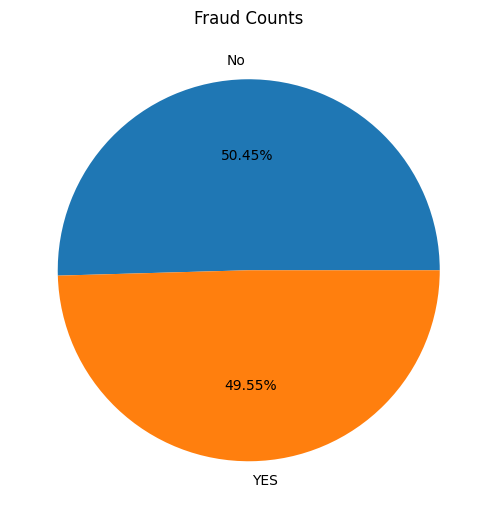

In [264]:
fraud = df["Fraud Flag or Label"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "YES"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [265]:
df

,Transaction Date and Time,Transaction Amount,Merchant Category Code (MCC),Card Type,Transaction Response Code,Fraud Flag or Label,Previous Transactions,Device Information,Transaction Source_In-Person,Transaction Source_Online
4654,1633,3025.08,6815,1,0,0,1,0,1,0
3834,385,3391.51,8557,2,12,0,3,1,0,1
7987,732,890.56,4020,2,0,1,1,0,0,1
3817,291,1530.82,5640,0,5,0,0,2,0,1
2531,1362,2588.62,3485,0,12,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7892,799,3501.56,5600,1,12,0,2,1,0,1
6962,1004,671.05,3083,0,12,1,0,2,0,1
6512,1882,3747.76,7106,1,12,0,2,2,1,0
1830,899,2810.37,7458,0,12,0,0,2,0,1


In [266]:
X=df.drop(columns=['Fraud Flag or Label'])
Y = df['Fraud Flag or Label']

In [267]:
X.shape

(2000, 9)

In [268]:
Y.shape

(2000,)

In [269]:
"""scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=['number']).columns  # Select only numeric columns
X_numeric = X[numeric_columns]  # Select the numeric columns from the original dataframe
X_scaled = scaler.fit_transform(X_numeric)"""

"scaler = StandardScaler()\nnumeric_columns = X.select_dtypes(include=['number']).columns  # Select only numeric columns\nX_numeric = X[numeric_columns]  # Select the numeric columns from the original dataframe\nX_scaled = scaler.fit_transform(X_numeric)"

In [270]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [271]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the shapes of train and test sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (1400, 9) (1400,)
Test set: (600, 9) (600,)


In [272]:
y_test.value_counts(normalize=True)

1    0.516667
0    0.483333
Name: Fraud Flag or Label, dtype: float64

In [273]:
#implementation of multilayer perceptron
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [274]:
#with 128 input nodes
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

relu activation function :is one of the deeplearning models where this function returns 0 if there is any negative input
but for any positive value X it returns the value back and that function is written as f(x) =max(0,x).

Binary Cross Entropy : it is a loss function used in machine learning and deep learning to measure the difference between predicted binary outcomes and actual binary labels. It quantifies the dissimilarity between probability distributions

In [275]:
#with 128 input nodes
model2 = Sequential()
model2.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=1, activation='tanh'))

In [276]:
#with 64 input nodes
model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

In [277]:
#Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [278]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [290]:
#for 128 input nodes with adam
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
44/44 [==============================] - 0s 10ms/step - loss: 0.6448 - accuracy: 0.6279 - val_loss: 0.7136 - val_accuracy: 0.4933
Epoch 2/100
44/44 [==============================] - 1s 12ms/step - loss: 0.6433 - accuracy: 0.6429 - val_loss: 0.7161 - val_accuracy: 0.4917
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 0.6409 - accuracy: 0.6414 - val_loss: 0.7239 - val_accuracy: 0.4867
Epoch 4/100
44/44 [==============================] - 0s 11ms/step - loss: 0.6336 - accuracy: 0.6536 - val_loss: 0.7185 - val_accuracy: 0.5067
Epoch 5/100
44/44 [==============================] - 0s 9ms/step - loss: 0.6296 - accuracy: 0.6364 - val_loss: 0.7285 - val_accuracy: 0.4883
Epoch 6/100
44/44 [==============================] - 0s 11ms/step - loss: 0.6256 - accuracy: 0.6593 - val_loss: 0.7319 - val_accuracy: 0.4967
Epoch 7/100
44/44 [==============================] - 0s 8ms/step - loss: 0.6221 - accuracy: 0.6443 - val_loss: 0.7312 - val_accuracy: 0.4933
Epoch 8/1

In [288]:
model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
44/44 [==============================] - 0s 6ms/step - loss: 0.6652 - accuracy: 0.6150 - val_loss: 0.7078 - val_accuracy: 0.4750
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6179 - val_loss: 0.7057 - val_accuracy: 0.4817
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.6257 - val_loss: 0.7083 - val_accuracy: 0.4983
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.6193 - val_loss: 0.7073 - val_accuracy: 0.5133
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6567 - accuracy: 0.6307 - val_loss: 0.7100 - val_accuracy: 0.4867
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.6548 - accuracy: 0.6321 - val_loss: 0.7151 - val_accuracy: 0.4883
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6314 - val_loss: 0.7107 - val_accuracy: 0.5067
Epoch 8/100
4

In [292]:
accuracy1 = model.evaluate(X_test, y_test)
accuracy2 = model1.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy1)
print('Model accuracy(64 nodes): ', accuracy2)

19/19 [==============================] - 0s 6ms/step - loss: 0.9708 - accuracy: 0.5000
Model accuracy(128 nodes):  [1.2694109678268433, 0.4716666638851166]
Model accuracy(64 nodes):  [0.9707638621330261, 0.5]


In [283]:
from sklearn.metrics import precision_recall_curve, confusion_matrix

In [284]:
pred1 = model.predict(X_test)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred1)
pred2 = model1.predict(X_test)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred2)

19/19 [==============================] - 0s 2ms/step


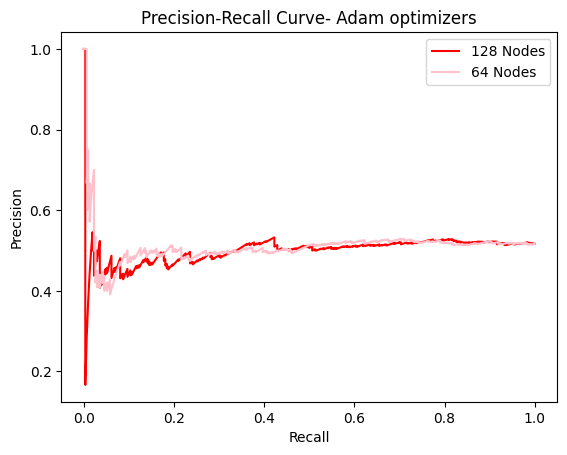

In [285]:

labels = ['64 Nodes', '128 Nodes']
plt.plot(recall1, precision1, color='red', label=labels[1])
plt.plot(recall2, precision2, color='pink', label=labels[0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- Adam optimizers')
plt.legend()
plt.show()

Precision:

Denotes the proportion of true positives among the predicted positives. In layman's terms, it reflects the accuracy of your model's positive predictions. A high precision signifies that most of the positive predictions made by the model are indeed correct.

Recall:
Represents the proportion of true positives that are correctly identified by the model. In simpler terms, it indicates how well the model captures all the actual positive cases. A high recall implies that the model isn't missing many genuine positive instances.

[[148 142]
 [166 144]]


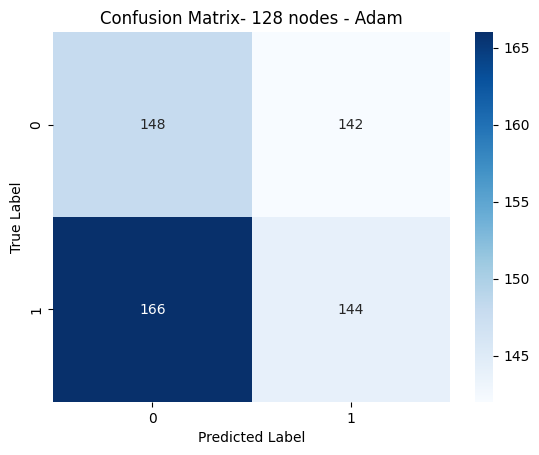

In [286]:
confusion_matrix_result = confusion_matrix(y_test, pred1.round())
print(confusion_matrix_result)
sn.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 128 nodes - Adam')
plt.show()

[[146 144]
 [167 143]]


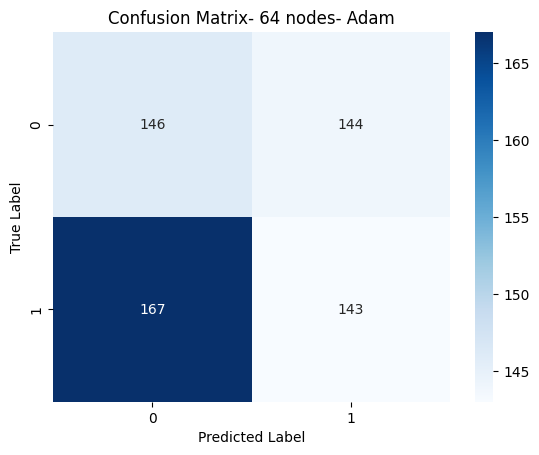

In [287]:
confusion_matrix_result = confusion_matrix(y_test, pred2.round())
print(confusion_matrix_result)
sn.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 64 nodes- Adam')
plt.show()

 the model seems to perform well in identifying true positives (fraudulent transactions) but has misclassified one instance as a false negative (non-fraudulent transaction). This indicates that the model's ability to detect fraudulent transactions is good, but there is room for improvement to reduce false negatives.